# UberEats配達データ分析

In [1]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0)

In [3]:
FILE_PATH = './../data/trip_master.csv'
master = pd.read_csv(FILE_PATH, index_col='id')

In [4]:
print(len(master))
# master.head(5)

204


In [5]:
master.columns

Index(['date', 'day', 'day_of_week', 'distance', 'drive_time', 'drop_address',
       'drop_latitude', 'drop_longitude', 'drop_time', 'month',
       'pickup_address', 'pickup_latitude', 'pickup_longitude', 'pickup_time',
       'price', 'url', 'year', 'cash', 'peak'],
      dtype='object')

In [6]:
df = master.assign(
    pickup_datetime= master.apply(lambda x: datetime.datetime(year=x.year, month=x.month, day=x.day, 
                                                           hour=int(x.pickup_time.split(':')[0]), minute=int(x.pickup_time.split(':')[1])), axis=1),
    drop_datetime= master.apply(lambda x: datetime.datetime(year=x.year, month=x.month, day=x.day, 
                                                           hour=int(x.drop_time.split(':')[0]), minute=int(x.drop_time.split(':')[1])), axis=1),    
    shop_position_id = master.apply(lambda x: str(x.pickup_latitude) + "-" + str(x.pickup_longitude), axis=1)
                  ) .drop(['date', 'day', 'year', 'url', 'pickup_latitude', 'pickup_time', 'pickup_longitude', 'pickup_address', 
                           'day_of_week', 'pickup_time', 'drop_time', "drop_address", "drop_latitude", "drop_longitude"], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, d92f23b6-46a8-48d7-823c-8cadb9182193 to 22088f04-3d91-42a7-8008-810d385041f2
Data columns (total 9 columns):
distance            204 non-null float64
drive_time          204 non-null float64
month               204 non-null int64
price               204 non-null int64
cash                31 non-null float64
peak                31 non-null float64
pickup_datetime     204 non-null datetime64[ns]
drop_datetime       204 non-null datetime64[ns]
shop_position_id    204 non-null object
dtypes: datetime64[ns](2), float64(4), int64(2), object(1)
memory usage: 15.9+ KB


In [8]:
df['date'] = df['pickup_datetime'].dt.date
df['day_of_week_num'] = df['pickup_datetime'].dt.dayofweek
df['day_of_week'] = df['pickup_datetime'].dt.weekday_name
df['month_day_num'] = df['pickup_datetime'].dt.day
df["hour_of_day"] = df['pickup_datetime'].dt.hour
df["week_of_month"] = df['pickup_datetime'].dt.week

In [9]:
# df.head(3)

## 毎日のデータ集計

In [10]:
target_day = datetime.datetime(2020, 1, 14).date()
# target_day = datetime.datetime.today().date()
df_day = df[df["date"] == target_day].sort_values('pickup_datetime')

In [11]:
df_day

,distance,drive_time,month,price,cash,peak,pickup_datetime,drop_datetime,shop_position_id,date,day_of_week_num,day_of_week,month_day_num,hour_of_day,week_of_month
id,,,,,,,,,,,,,,,
469bf045-b60f-47ab-bcd7-270d3032a4e5,0.85,13.5,1,379,0.0,0.0,2020-01-14 11:37:00,2020-01-14 11:52:00,35.57989501953125-139.65957641601562,2020-01-14,1,Tuesday,14,11,3
22088f04-3d91-42a7-8008-810d385041f2,1.35,13.1,1,406,0.0,0.0,2020-01-14 11:58:00,2020-01-14 12:11:00,35.57328414916992-139.65731811523438,2020-01-14,1,Tuesday,14,11,3
777d53d7-c2cb-49a0-aa82-0e284364ce3d,2.51,23.3,1,628,0.0,0.0,2020-01-14 13:02:00,2020-01-14 13:27:00,35.53098678588867-139.69990539550778,2020-01-14,1,Tuesday,14,13,3
cbd626d1-f3fb-4131-b217-d733889f836a,1.45,16.7,1,540,2268.0,130.0,2020-01-14 13:29:00,2020-01-14 13:57:00,35.53101348876953-139.69978332519528,2020-01-14,1,Tuesday,14,13,3
14a029a8-828f-4f56-b16a-ae0be5cb36e9,0.45,8.1,1,357,0.0,0.0,2020-01-14 14:07:00,2020-01-14 14:22:00,35.528263092041016-139.70054626464844,2020-01-14,1,Tuesday,14,14,3
8f1d1249-cc81-4968-b505-1bc255d5ac55,2.83,29.4,1,485,1928.0,0.0,2020-01-14 14:30:00,2020-01-14 15:11:00,35.53038787841797-139.69674682617188,2020-01-14,1,Tuesday,14,14,3
85636e9e-264e-4ce7-926c-326902288e22,1.06,16.3,1,390,0.0,0.0,2020-01-14 15:24:00,2020-01-14 15:56:00,35.52933120727539-139.69993591308594,2020-01-14,1,Tuesday,14,15,3
2e642712-9ad6-41fd-8095-219a51b50f44,2.06,13.3,1,444,0.0,0.0,2020-01-14 16:00:00,2020-01-14 16:20:00,35.52880096435547-139.69869995117188,2020-01-14,1,Tuesday,14,16,3
3a58bf69-57c8-408a-a8c3-e6522a48d836,0.63,7.5,1,366,0.0,0.0,2020-01-14 16:24:00,2020-01-14 16:41:00,35.53102111816406-139.69985961914062,2020-01-14,1,Tuesday,14,16,3


In [12]:
drive_count = len(df_day)
drive_hours = round(df_day["drive_time"].sum() / 60, 1)
drive_length = round(df_day["distance"].sum() , 2)
total_price = df_day["price"].sum()
long_count = len(df_day[df_day["distance"] >= 2])
cash_count = len(df_day[df_day["cash"] != 0])
peak_count = len(df_day[df_day["peak"] != 0])

In [13]:
print("{}  配達件数: {}件, 配達時間: {}h, 配達距離: {}km, 配達報酬: {}円, ロッグドロップ{}件, ピーク{}件, 現金{}件"
      .format(target_day, drive_count, drive_hours, drive_length, total_price, long_count, peak_count, cash_count))

2020-01-14  配達件数: 15件, 配達時間: 4.4h, 配達距離: 29.04km, 配達報酬: 7235円, ロッグドロップ7件, ピーク3件, 現金6件


## 日別の集計

In [14]:
groupby = df.groupby('date')

In [15]:
df_by_day = pd.DataFrame()
df_by_day["配達件数"] = groupby["pickup_datetime"].count()
df_by_day["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_day["配達距離(km)"] = groupby["distance"].sum()
df_by_day["配達報酬(円)"] = groupby["price"].sum()
df_by_day["ロングドロップ"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())
df_by_day["ピーク件数"] = groupby.apply(lambda x: x[x.peak != 0]['peak'].count())
df_by_day["現金件数"] = groupby.apply(lambda x: x[x.cash != 0]['cash'].count())
df_by_day["1kmの時間(分)"] = round(groupby["drive_time"].sum() / groupby["distance"].sum(), 1)
df_by_day["時速"] = round(groupby["distance"].sum()/(groupby["drive_time"].sum()/60), 2)

In [16]:
df_by_day.index.name = '月日'
df_by_day.tail(30)

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロングドロップ,ピーク件数,現金件数,1kmの時間(分),時速
月日,,,,,,,,,
2019-12-11,2,1.1,4.41,902,1,0,0,14.6,4.12
2019-12-12,3,1.2,4.75,1254,1,0,0,14.7,4.08
2019-12-13,7,2.7,14.01,3223,3,0,0,11.5,5.22
2019-12-15,9,3.6,12.91,4559,2,0,0,16.5,3.64
2019-12-16,7,2.1,6.48,3119,0,0,0,19.4,3.10
2019-12-17,3,1.5,5.29,1588,1,0,0,16.8,3.57
2019-12-18,7,3.4,18.90,3570,4,0,0,10.7,5.61
2019-12-19,11,4.0,24.32,5492,6,0,0,9.9,6.04
2019-12-24,11,3.6,15.82,5341,0,0,0,13.6,4.41


## 週別の集計

In [17]:
groupby = df.groupby('week_of_month')

In [18]:
df_by_week = pd.DataFrame()
df_by_week["配達件数"] = groupby["pickup_datetime"].count()
df_by_week["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_week["配達距離(km)"] = groupby["distance"].sum()
df_by_week["配達報酬(円)"] = groupby["price"].sum()
df_by_week["ロングドロップ"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())
df_by_week["ピーク件数"] = groupby.apply(lambda x: x[x.peak != 0]['peak'].count())
df_by_week["現金件数"] = groupby.apply(lambda x: x[x.cash != 0]['cash'].count())
df_by_week["1kmの時間(分)"] = round(groupby["drive_time"].sum() / groupby["distance"].sum(), 1)
df_by_week["時速"] = round(groupby["distance"].sum()/(groupby["drive_time"].sum()/60), 2)

In [19]:
df_by_week.index.name = '週番号'
df_by_week.tail(30)

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロングドロップ,ピーク件数,現金件数,1kmの時間(分),時速
週番号,,,,,,,,,
1,26,6.5,40.66,12875,7,0,0,9.6,6.23
2,59,15.0,88.88,26269,13,0,0,10.1,5.93
3,31,7.8,52.48,15741,11,11,16,9.0,6.70
50,21,8.5,36.08,9938,7,0,0,14.1,4.26
51,28,11.0,54.99,13769,11,0,0,12.0,5.01
52,39,10.6,61.73,19793,7,0,0,10.3,5.84


## 月別の集計

In [20]:
groupby = df.groupby('month')
df_by_month = pd.DataFrame()
df_by_month["配達件数"] = groupby["pickup_datetime"].count()
df_by_month["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_month["配達距離(km)"] = groupby["distance"].sum()
df_by_month["配達報酬(円)"] = groupby["price"].sum()
df_by_month["ロングドロップ"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())
df_by_month["ピーク件数"] = groupby.apply(lambda x: x[x.peak != 0]['peak'].count())
df_by_month["現金件数"] = groupby.apply(lambda x: x[x.cash != 0]['cash'].count())
df_by_month["1kmの時間(分)"] = round(groupby["drive_time"].sum() / groupby["distance"].sum(), 1)
df_by_month["時速"] = round(groupby["distance"].sum()/(groupby["drive_time"].sum()/60), 2)

In [21]:
df_by_month.index.name = '月'
df_by_month

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロングドロップ,ピーク件数,現金件数,1kmの時間(分),時速
月,,,,,,,,,
1,104,26.3,165.05,49648,29,11,16,9.6,6.28
12,100,33.1,169.77,48737,27,0,0,11.7,5.13


## 全データ分析

Text(0.5, 1.0, '曜日ごとの配達回数')

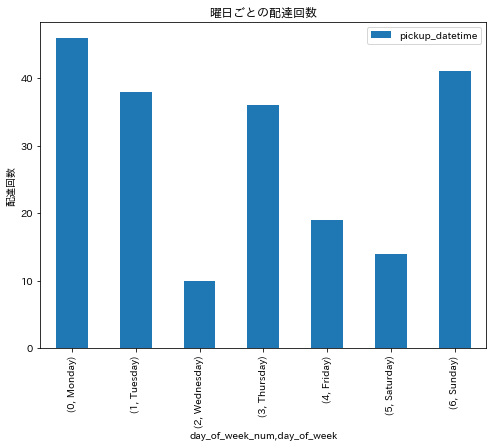

In [22]:
uber_weekdays = df.pivot_table(index=['day_of_week_num','day_of_week'],
                                  values='pickup_datetime',
                                  aggfunc='count')
uber_weekdays.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('曜日ごとの配達回数')

Text(0.5, 1.0, '日にちごとの配達回数')

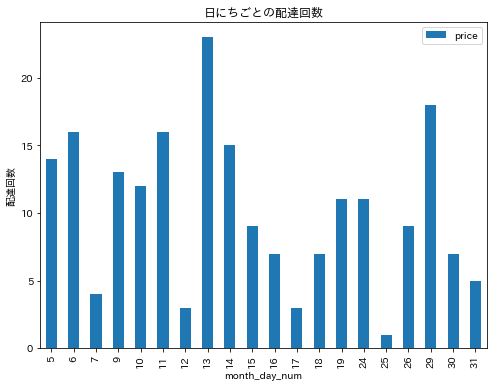

In [23]:
uber_monthdays = df.pivot_table(index=['month_day_num'],
                                  values='price',
                                  aggfunc='count')
uber_monthdays.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('日にちごとの配達回数')

Text(0.5, 1.0, '時間ごとの配達回数')

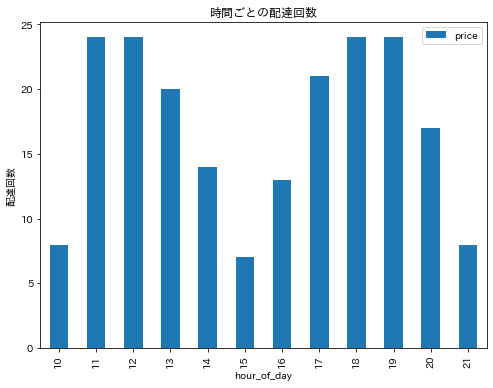

In [24]:
uber_hour = df.pivot_table(index=['hour_of_day'],
                                  values='price',
                                  aggfunc='count')
uber_hour.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('時間ごとの配達回数')

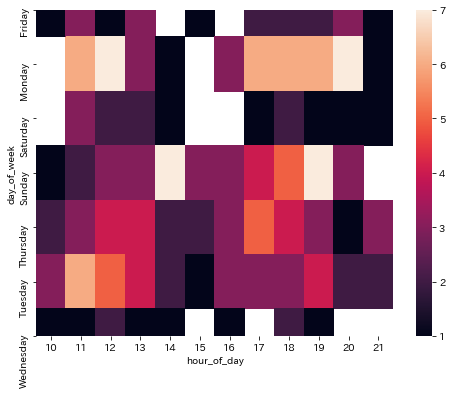

In [25]:
def count_rows(rows):
    return len(rows)

by_cross = df.groupby('day_of_week hour_of_day'.split()).apply(count_rows).unstack()
sns.heatmap(by_cross)